In [2]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv("laptop_price.csv")

In [6]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [7]:
df = df.drop(["Product"], axis=1)

In [8]:
toModify = ["Company", "TypeName", "ScreenResolution", "CPU_Company", "CPU_Type", "Memory", "GPU_Company", "GPU_Type", "OpSys"]
for col in toModify:
    df[col] = df[col].apply(lambda x: list(df[col].unique()).index(x))
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,0,0,13.3,0,0,0,2.3,8,0,0,0,0,1.37,1339.69
1,0,0,13.3,1,0,0,1.8,8,1,0,1,0,1.34,898.94
2,1,1,15.6,2,0,1,2.5,8,2,0,2,1,1.86,575.00
3,0,0,15.4,3,0,2,2.7,16,3,1,3,0,1.83,2537.45
4,0,0,13.3,0,0,0,3.1,8,2,0,4,0,1.37,1803.60


<Axes: >

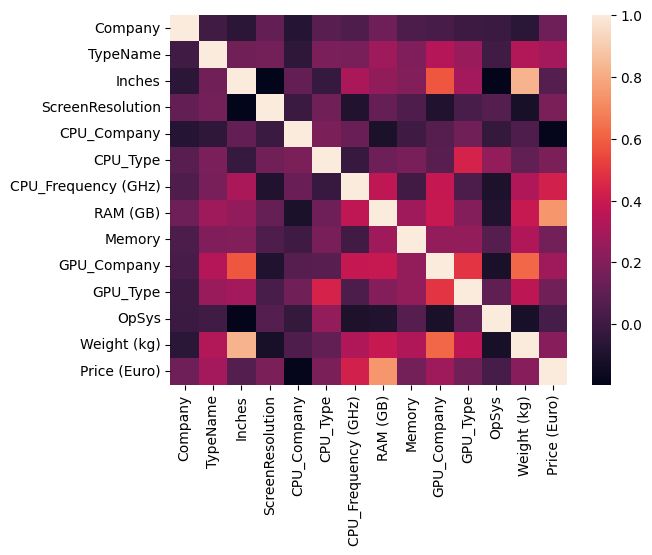

In [13]:
sns.heatmap(df.corr())

In [16]:
X = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company',
       'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'GPU_Company',
       'GPU_Type', 'OpSys', 'Weight (kg)']]

In [17]:
y = df["Price (Euro)"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])

,Coeff
Company,-0.507421
TypeName,41.983229
Inches,-49.263941
ScreenResolution,7.419760
CPU_Company,-416.450687
CPU_Type,2.641985
CPU_Frequency (GHz),363.700809
RAM (GB),86.315944
Memory,-4.134731
GPU_Company,15.883089


In [26]:
predictions = lm.predict(X_test)

<Axes: xlabel='Price (Euro)', ylabel='Count'>

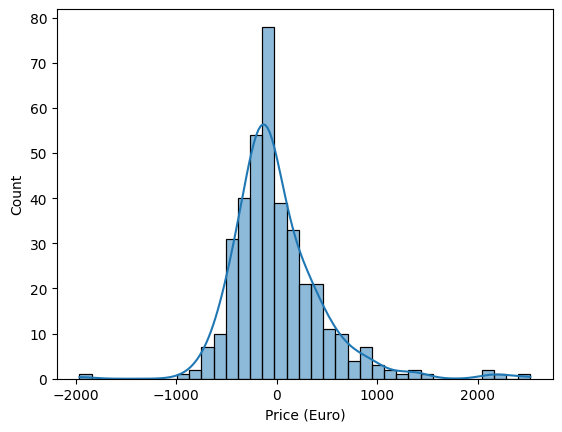

In [ ]:
# Normal distribution means model was good fit
sns.histplot((y_test-predictions), kde=True)

In [33]:
metrics.mean_absolute_error(y_test, predictions)

317.8371160668765

In [34]:
metrics.mean_squared_error(y_test, predictions)

208099.57199637624

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(456.1793200007824)